In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rawdata/house_data.csv")

## Feature description
- **id** - Unique id for each home sold  
- **date** - Date of the home sold  
- **price** - Price of each home sold  
- **bedrooms** - Number of bedrooms  
- **bathrooms** - Number of bathrooms  
- **sqft_living** - Square footage of the apartment's interior living space  
- **sqft_lot** - Square footage of the land space  
- **floors** - Number of floors  
- **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not  
- **view** - An index from 0 to 4 of how good the view of the property was  
- **condition** - An index from 1 to 5 on the condition of the apartment  
- **grade** - An index from 1 to 13, where 1–3 falls short of building construction and design, 7 has an average level, and 11–13 have a high quality level of construction and design  
- **sqft_above** - Square footage of the interior housing space that is above ground level  
- **sqft_basement** - Square footage of the interior housing space that is below ground level  
- **yr_built** - The year the house was initially built  
- **yr_renovated** - The year of the house's last renovation  
- **zipcode** - Zipcode area the house is in  
- **lat** - Latitude  
- **long** - Longitude  
- **sqft_living15** - Square footage of interior living space for the nearest 15 neighbours  
- **sqft_lot15** - Square footage of the land lots of the nearest 15 neighbours  


In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df = df.drop(columns=["id", "date"])
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in [ 'bedrooms', 'bathrooms', 'sqft_living', ]:
    df = remove_outliers_iqr(df, col)

df.shape

(20229, 19)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.022900e+04,20229.000000,20229.000000,20229.000000,2.022900e+04,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000,20229.000000
mean,5.005285e+05,3.310445,2.041747,1971.557319,1.416508e+04,1.477779,0.005635,0.198379,3.415493,7.564536,1704.926838,266.630481,1970.713876,78.626872,98078.379604,47.558202,-122.215195,1932.984923,12115.546344
std,2.680658e+05,0.784729,0.667774,730.306704,3.933426e+04,0.537765,0.074860,0.698982,0.650777,1.039819,693.673992,402.684111,29.120609,388.262518,53.532892,0.140262,0.140687,613.567391,24881.713742
min,7.800000e+04,2.000000,0.750000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,440.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.179500e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.463000,-122.330000,1480.000000,5058.000000
50%,4.400000e+05,3.000000,2.250000,1870.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1974.000000,0.000000,98065.000000,47.569500,-122.234000,1810.000000,7553.000000
75%,6.142850e+05,4.000000,2.500000,2440.000000,1.030000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2110.000000,520.000000,1996.000000,0.000000,98118.000000,47.679000,-122.127000,2300.000000,9900.000000
max,3.100000e+06,5.000000,3.500000,4070.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,4070.000000,2030.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20229 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20229 non-null  int64  
 1   bedrooms       20229 non-null  int64  
 2   bathrooms      20229 non-null  float64
 3   sqft_living    20229 non-null  int64  
 4   sqft_lot       20229 non-null  int64  
 5   floors         20229 non-null  float64
 6   waterfront     20229 non-null  int64  
 7   view           20229 non-null  int64  
 8   condition      20229 non-null  int64  
 9   grade          20229 non-null  int64  
 10  sqft_above     20229 non-null  int64  
 11  sqft_basement  20229 non-null  int64  
 12  yr_built       20229 non-null  int64  
 13  yr_renovated   20229 non-null  int64  
 14  zipcode        20229 non-null  int64  
 15  lat            20229 non-null  float64
 16  long           20229 non-null  float64
 17  sqft_living15  20229 non-null  int64  
 18  sqft_lot15 

In [7]:
df.isnull().sum()
df.nunique()

price            3703
bedrooms            4
bathrooms          12
sqft_living       766
sqft_lot         9196
floors              6
waterfront          2
view                5
condition           5
grade               9
sqft_above        755
sqft_basement     247
yr_built          116
yr_renovated       69
zipcode            70
lat              4989
long              748
sqft_living15     699
sqft_lot15       8164
dtype: int64

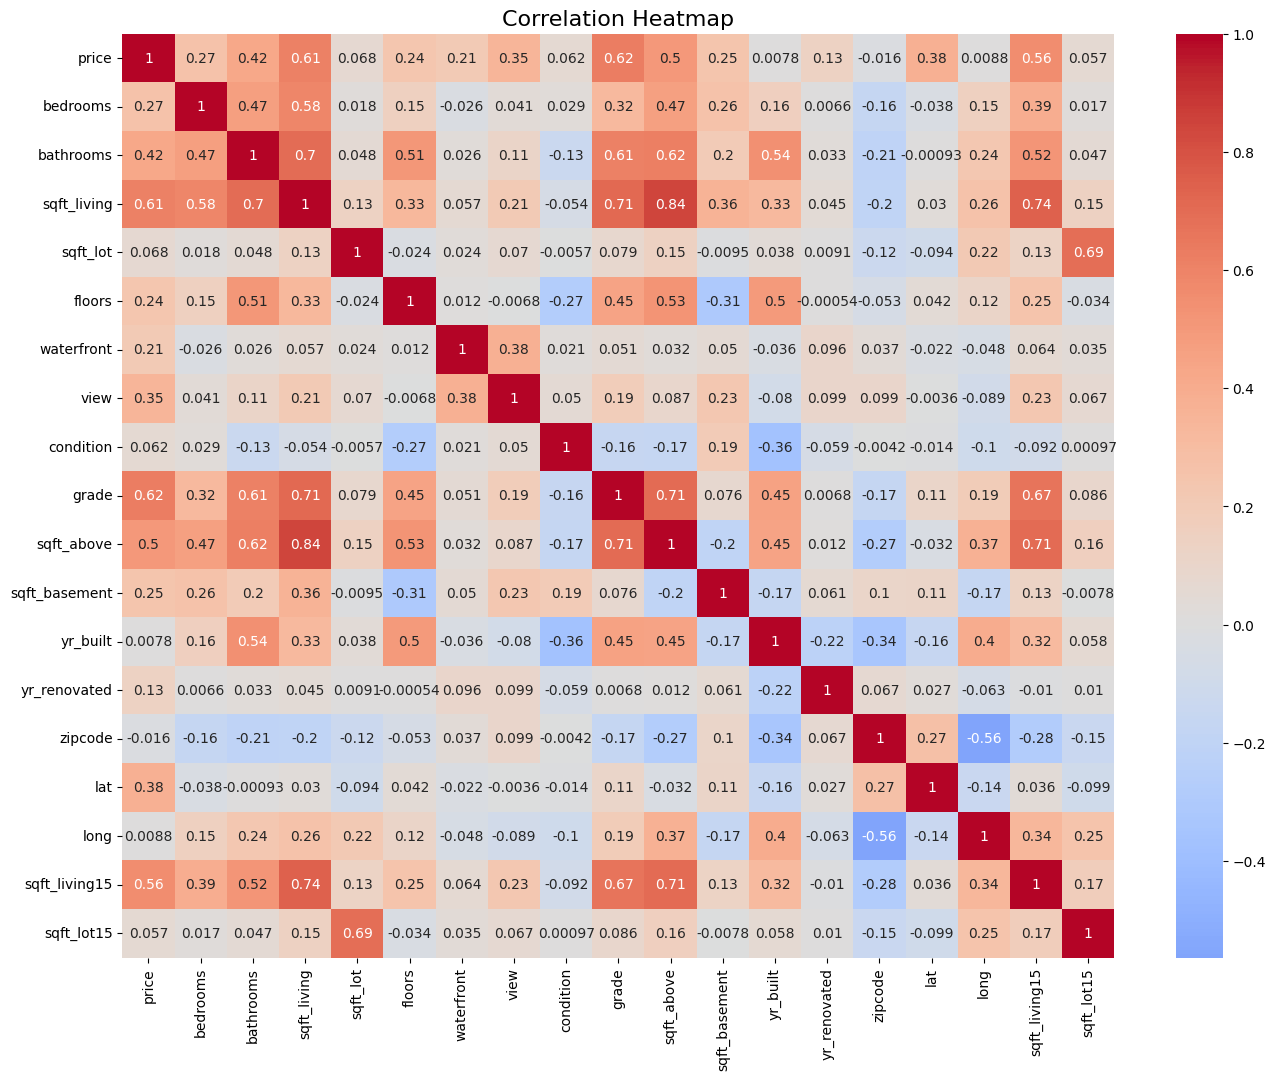

In [8]:
plt.figure(figsize=(16, 12))  # Adjust width and height as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

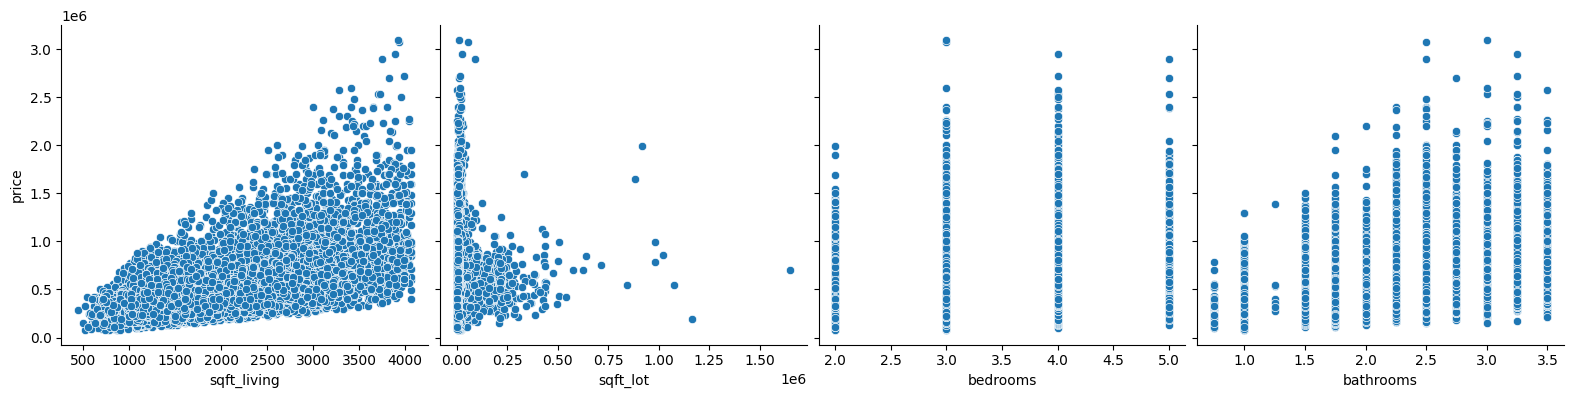

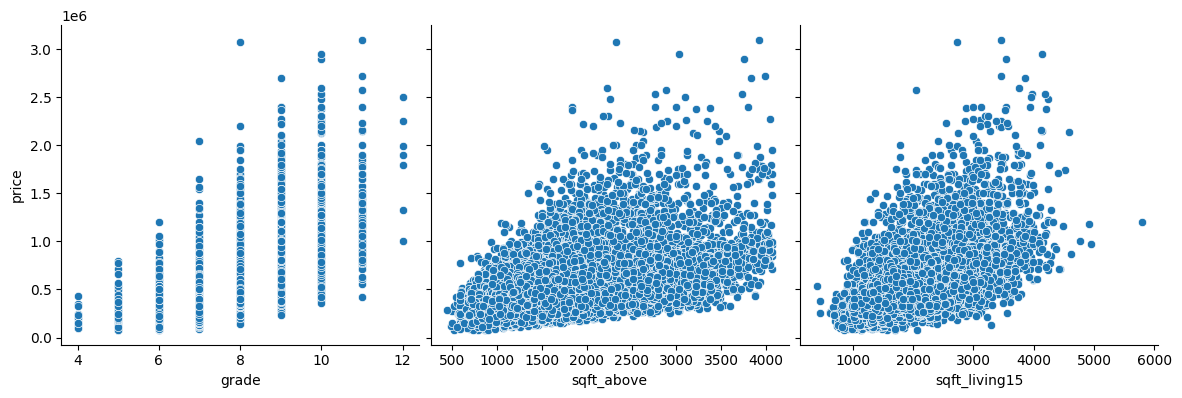

In [9]:
sns.pairplot(df, x_vars=["sqft_living", "sqft_lot", "bedrooms",  "bathrooms" ],  y_vars=['price'],  
             height=4 , kind="scatter" ,aspect=1, diag_kind="kde")
sns.pairplot(df, x_vars=["grade" , "sqft_above" , "sqft_living15"],  y_vars=['price'],  
             height=4 , kind="scatter" ,aspect=1, diag_kind="kde")

# Splitting data

In [ ]:
from sklearn.model_selection import train_test_split 
X = df.drop(columns=["price","sqft_lot"], axis=1)
Y = df[["price"]]
print(X.shape)
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

(20229, 17)
<class 'pandas.core.series.Series'>


# Normalizing Data

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 22517147887.529
Mean Absolute Error: 104250.28874052948
R-squared: 0.6618138575454648


# Random Forest 

In [18]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=100, random_state=42)  # Create a Random Forest Regressor RF_model
RF_model = RF_model.fit(x_train,y_train.squeeze())  # Train /Fit the RF_model with feature and output
RF_y_pred=RF_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, RF_y_pred))
print("MSE:", mean_squared_error(y_test, RF_y_pred))
print("R^2 Score:", r2_score(y_test, RF_y_pred))
print("Accuracy score " , RF_model.score(x_test, y_test))


MAE: 61824.74064166451
MSE: 10118292753.52239
R^2 Score: 0.8480328675891232
Accuracy score  0.8480328675891232


# XG Boost

In [14]:
from xgboost import XGBRegressor

xgb_model  = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_y_pred))
print("XGBoost MSE:", mean_squared_error(y_test, xgb_y_pred))
print("XGBoost R^2 Score:", r2_score(y_test, xgb_y_pred))

XGBoost MAE: 59434.55859375
XGBoost MSE: 8781972480.0
XGBoost R^2 Score: 0.8681031465530396


# saving the model


In [23]:
# the best model from the above is XGBoost
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']